# Capítulo 3
## Processos Gaussianos

https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py

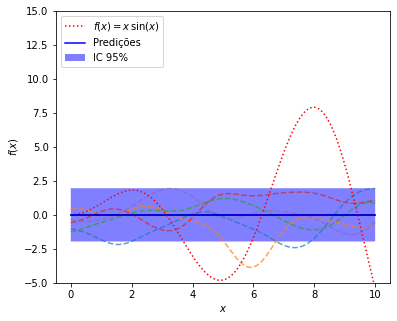

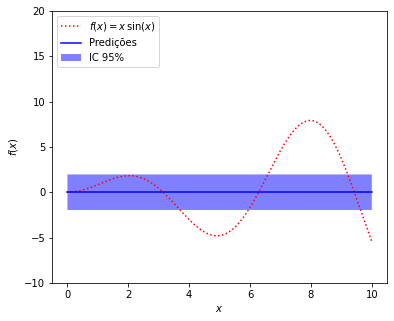

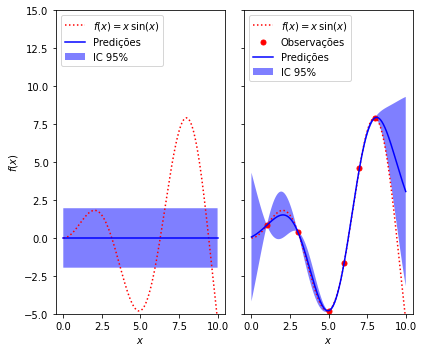

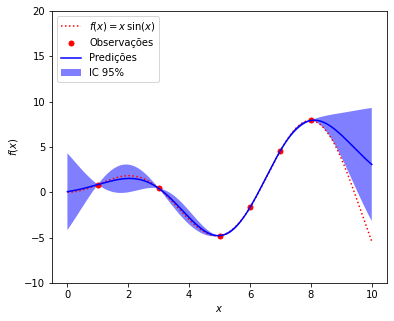

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)

def f(x):
    """The function to predict."""
    return x * np.sin(x)


def plot_gpr_samples(gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    x = np.linspace(0, 10, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7
        )
    ax.plot(x, y_mean, color="black")
    # ax.fill_between(
    #     x,
    #     y_mean - y_std,
    #     y_mean + y_std,
    #     alpha=0.1,
    #     color="black",
    #     label=r"$\pm$ 1 std. dev.",
    # )

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)


# No prior predictions
y_pred_unfit, sigma_unfit = gp.predict(x, return_std=True)

fig, ax = plt.subplots(1,1,figsize=(6,5))
plot_gpr_samples(gp, 5, ax)
ax.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
ax.plot(x, y_pred_unfit, 'b-', label='Predições')
ax.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred_unfit - 1.9600 * sigma_unfit,
                        (y_pred_unfit + 1.9600 * sigma_unfit)[::-1]]),
         alpha=.5, fc='b', ec='None', label='IC 95%')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_ylim(-5, 15)
ax.legend(loc='upper left')
plt.show()


fig, ax = plt.subplots(1,1,figsize=(6,5), sharey=True, sharex=True)
ax.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
ax.plot(x, y_pred_unfit, 'b-', label='Predições')
ax.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred_unfit - 1.9600 * sigma_unfit,
                        (y_pred_unfit + 1.9600 * sigma_unfit)[::-1]]),
         alpha=.5, fc='b', ec='None', label='IC 95%')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_ylim(-10, 20)
ax.legend(loc='upper left')
plt.show()


fig, ax = plt.subplots(1,2,figsize=(6,5), sharey=True, sharex=True)

ax[0].plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
ax[0].plot(x, y_pred_unfit, 'b-', label='Predições')
ax[0].fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred_unfit - 1.9600 * sigma_unfit,
                        (y_pred_unfit + 1.9600 * sigma_unfit)[::-1]]),
         alpha=.5, fc='b', ec='None', label='IC 95%')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$f(x)$')
ax[0].set_ylim(-5, 15)
ax[0].legend(loc='upper left')



# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
ax[1].plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
ax[1].plot(X, y, 'r.', markersize=10, label='Observações')
ax[1].plot(x, y_pred, 'b-', label='Predições')
ax[1].fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='IC 95%')
ax[1].set_xlabel('$x$')
#ax[1].set_ylabel('$f(x)$')
#ax[1].set_ylim(-10, 20)
ax[1].legend(loc='upper left')
fig.tight_layout()
plt.show()



fig, ax = plt.subplots(1,1,figsize=(6,5), sharey=True, sharex=True)
ax.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
ax.plot(X, y, 'r.', markersize=10, label='Observações')
ax.plot(x, y_pred, 'b-', label='Predições')
ax.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='IC 95%')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_ylim(-10, 20)
ax.legend(loc='upper left')
plt.show()


# ----------------------------------------------------------------------
# now the noisy case
# X = np.linspace(0.1, 9.9, 20)
# X = np.atleast_2d(X).T

# # Observations and noise
# y = f(X).ravel()
# dy = 0.5 + 1.0 * np.random.random(y.shape)
# noise = np.random.normal(0, dy)
# y += noise

# # Instantiate a Gaussian Process model
# gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
#                               n_restarts_optimizer=10)

# # Fit to data using Maximum Likelihood Estimation of the parameters
# gp.fit(X, y)

# # Make the prediction on the meshed x-axis (ask for MSE as well)
# y_pred, sigma = gp.predict(x, return_std=True)

# # Plot the function, the prediction and the 95% confidence interval based on
# # the MSE
# plt.figure()
# plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
# plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
# plt.plot(x, y_pred, 'b-', label='Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% confidence interval')
# plt.xlabel('$x$')
# plt.ylabel('$f(x)$')
# plt.ylim(-10, 20)
# plt.legend(loc='upper left')

# plt.show()

### Função de Aquisição

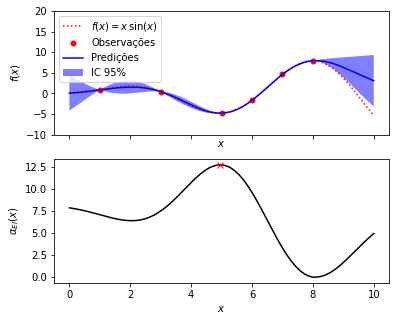

In [4]:
from scipy.stats import norm

#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)
y_pred, sigma = gp.predict(x, return_std=True)

# calculate the EI 
def f_ei(x, f_best):
    y_pred, y_std = gp.predict(x, return_std=True)
    delta = float(f_best) - y_pred
    z = (delta) / y_std
    ei_fobj = y_std*norm.pdf(z) + delta*norm.cdf(z)
    return ei_fobj


fig, ax = plt.subplots(2,1,figsize=(6,5), sharey=False, sharex=True)
ax[0].plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
ax[0].plot(X, y, 'r.', markersize=10, label='Observações')
ax[0].plot(x, y_pred, 'b-', label='Predições')
ax[0].fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='IC 95%')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$f(x)$')
ax[0].set_ylim(-10, 20)
ax[0].legend(loc='upper left')

f_best = max(y)
y_ei = f_ei(x, f_best)
ax[1].plot(x, y_ei, 'k')
ax[1].plot(x[np.argmax(y_ei)], max(y_ei), 'rx')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel(r'$\alpha_{EI}(x)$')
plt.show()

# for i in range(10):
#     #  First the noiseless case
#     X = np.atleast_2d([3., 8., float(np.argmax(y_ei))]).T
#     # Observations
#     y = f(X).ravel()
#     # Fit to data using Maximum Likelihood Estimation of the parameters
#     gp.fit(X, y)

#     fig, ax = plt.subplots(1,1,figsize=(6,5), sharey=True, sharex=True)
#     f_best = max(f(x))
#     y_ei = f_ei(x, f_best)
#     ax.plot(x, y_ei, 'k')
#     ax.plot(x[np.argmax(y_ei)], max(y_ei), 'rx')
#     ax.set_xlabel('$x$')
#     ax.set_ylabel(r'$\alpha_{EI}(x)$')
#     plt.show()



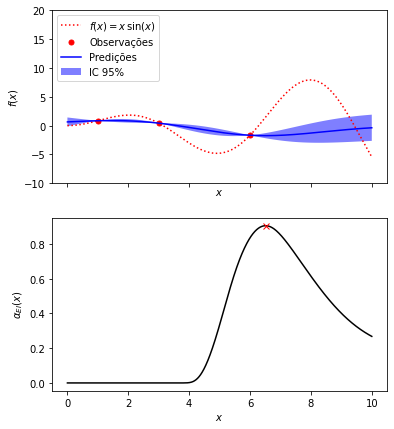

/home/victor/miniconda3/envs/rto-debug/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


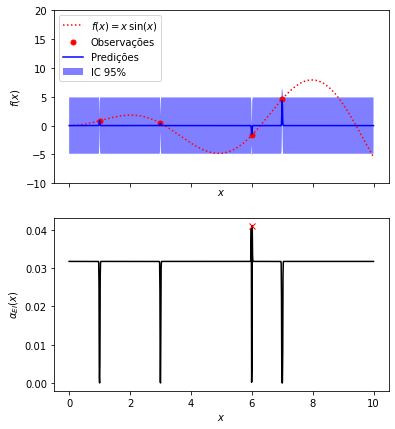

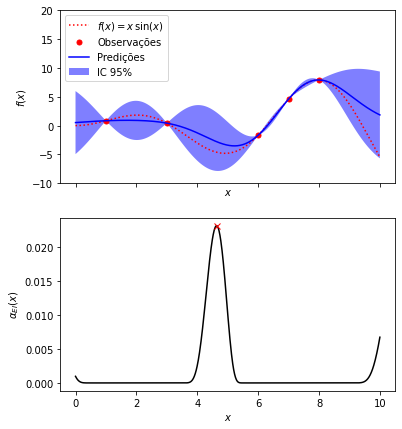

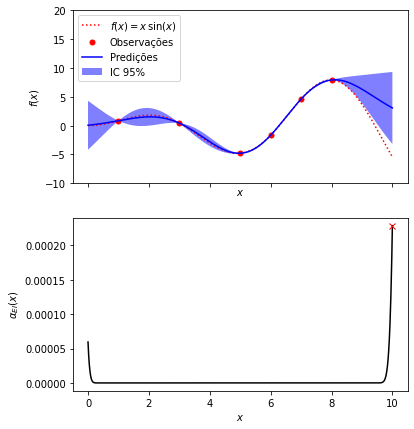

In [6]:
#  First the noiseless case
X = np.atleast_2d([1., 3., 6., 7., 8., 5.]).T

for i in range(2, X.shape[0]):

        #  First the noiseless case
        Xi = X[:(i+1),:]

        # Observations
        y = f(Xi).ravel()

        # Fit to data using Maximum Likelihood Estimation of the parameters
        # Instantiate a Gaussian Process model
        kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
        gp.fit(Xi, y)
        y_pred, sigma = gp.predict(x, return_std=True)

        fig, ax = plt.subplots(2,1,figsize=(6,7), sharey=False, sharex=True)
        ax[0].plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
        ax[0].plot(Xi, y, 'r.', markersize=10, label='Observações')
        ax[0].plot(x, y_pred, 'b-', label='Predições')
        ax[0].fill(np.concatenate([x, x[::-1]]),
                np.concatenate([y_pred - 1.9600 * sigma,
                                (y_pred + 1.9600 * sigma)[::-1]]),
                alpha=.5, fc='b', ec='None', label='IC 95%')
        ax[0].set_xlabel('$x$')
        ax[0].set_ylabel('$f(x)$')
        ax[0].set_ylim(-10, 20)
        ax[0].legend(loc='upper left')

        f_best = min(-y)
        y_ei = f_ei(x, f_best)
        ax[1].plot(x, y_ei, 'k')
        ax[1].plot(x[np.argmax(y_ei)], max(y_ei), 'rx',label='')
        ax[1].set_xlabel('$x$')
        ax[1].set_ylabel(r'$\alpha_{EI}(x)$')
        plt.show()

